# ML: KMeans++, Hierarchical clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


We don't need the ID for our algorithm. These are just identifiers.

How are we going to find the similarity between the observations. What Similarity metric are we going to use. How do we say two observations(two customers) are similar in their behvaior? <br> We're gonna use distance or cosine similarity.<br>Most of the times, we use distance, built K-means also uses distance metrics. Euclidean.

Pre Processing steps:<br>
We need to scale the data to bring all the features to the same scale.

In [4]:
X = df.copy()
X.describe()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [5]:
X = X.drop('ID', axis = 1)

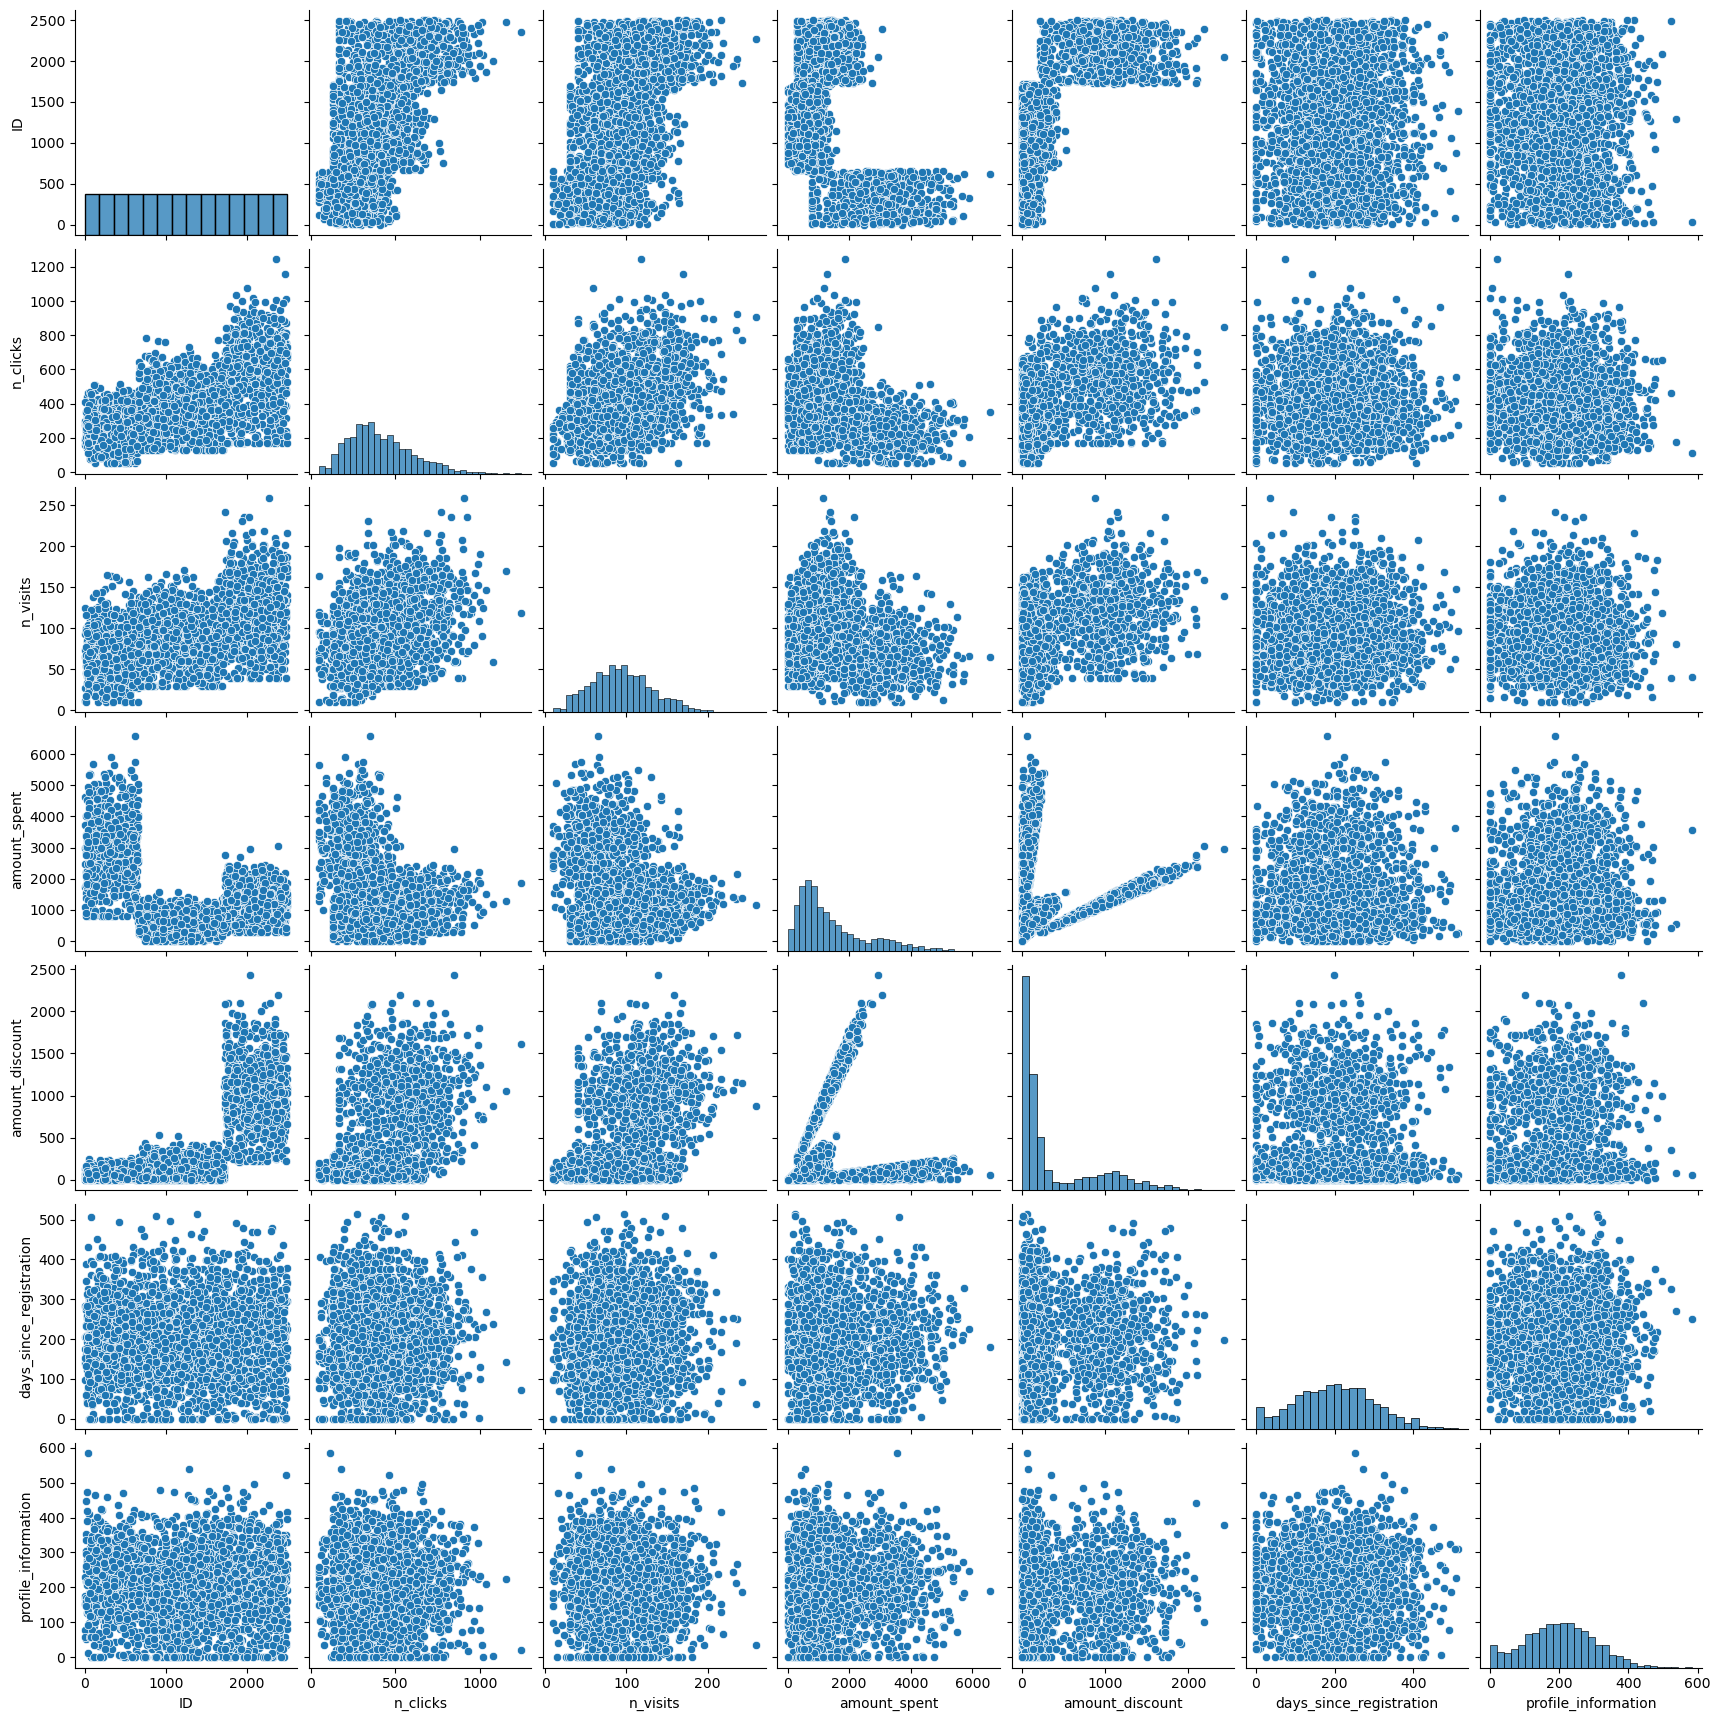

In [5]:
sns.pairplot(df)

We have ID in the plot, ignore first row and first column.<br>
Look at these plots, is there anywhere that the points are getting separated.

Below plot gives us an idea that there are like two groups here.

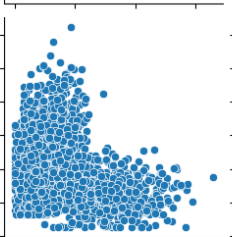

Below one has a weird shape but looks like there are three groups here.

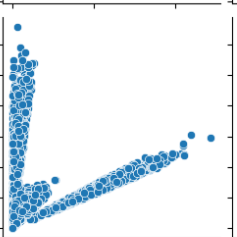

This is one way of visualizing. <br>
But, the limitation here is that we are looking at 2-dimensions at a time.<br>

For eg, the points you see below are, they're in a 2-D plane. The moment you add a third dimension, some points could be in front of us and others could be back on the wall.

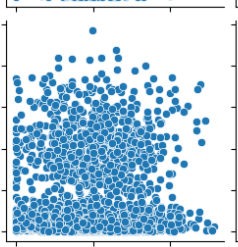

So, we can pick some hints from 2-D. We can say, there could be 2,3 clusters.<br>
We can try 2,3,4 and use elbow curve to see what the best one is.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Original distribution is maintained with StandardScaler. 
#  In minmaxscaler, if the min or max value is extreme outlier, then it skews it a little bit.

In [7]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

What's the datatype of X. Is it dataframe? It's a numpy array. You can't run describe statement on it.

In [8]:
X.shape

(2500, 6)

In [9]:
X.describe() # It won't work, it's a np array.

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Default arguments for KMeans:

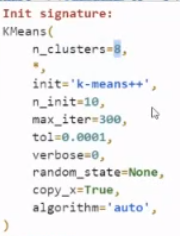

random_state: For reproducibility. Everytime we run this, same random centroids are picked up and you end up with same set of results.

In [10]:
# When we want to decide value of k
# 1. contact domain expert
# 2. Visualization, like a pair plot.
# 3. Pick roughly around what number you want to try, say 4
# 4. Then you try to run from 3 to 6 using a loop.
# 5. Look at the elbow curve and based on that, choose the ideal value.
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, init = "random", random_state=9)   # default value of initialization will be k-means++. So, we have to mention "random" which is the normal k-means algo.
kmeans.fit(X)
labels = kmeans.labels_

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
kmeans.inertia_ # Wcss 

280.1647840045067

In [12]:
labels  # assigned clusters

array([1, 1, 0, ..., 1, 2, 0])

If we change the random_state, it might not converge to the same point:

In [13]:
kmeans = KMeans(n_clusters=k, init = "random", random_state=1)  
kmeans.fit(X)
labels = kmeans.labels_

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
kmeans.inertia_ # Wcss 

280.1647840045067

Here it is converging to the same point, but that's not always the case.

Let's pick 3 random centroids that are closer to the clusters:

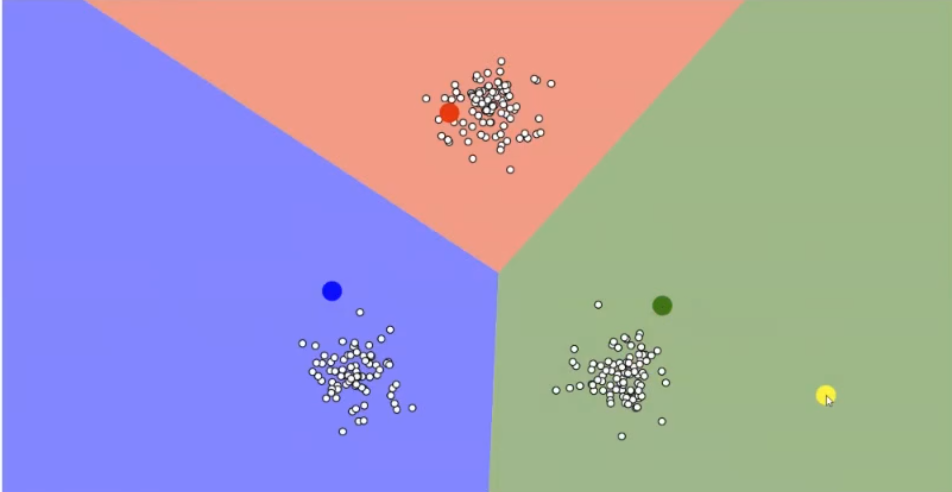

This is how they converge:

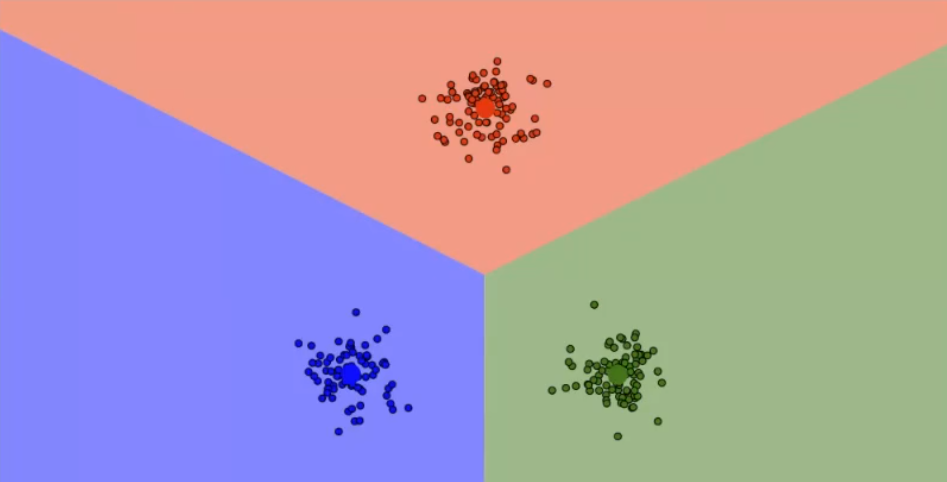

If we choose something like this:

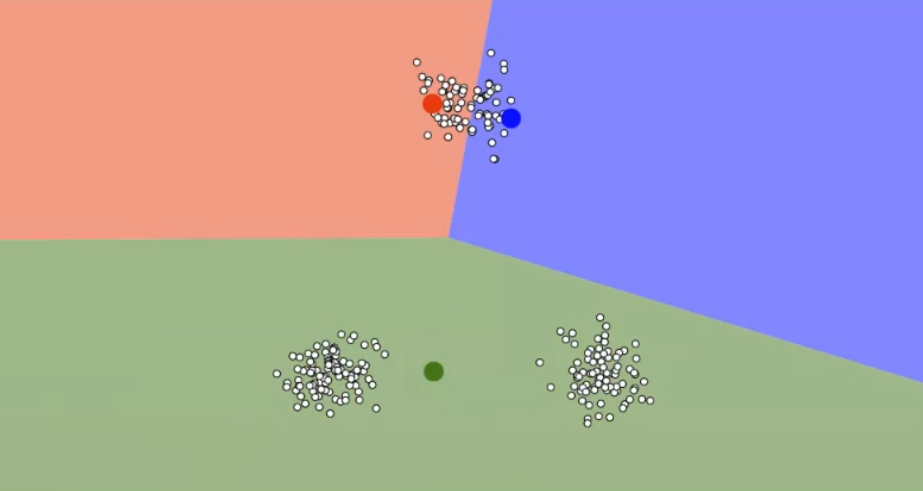

We end up with:

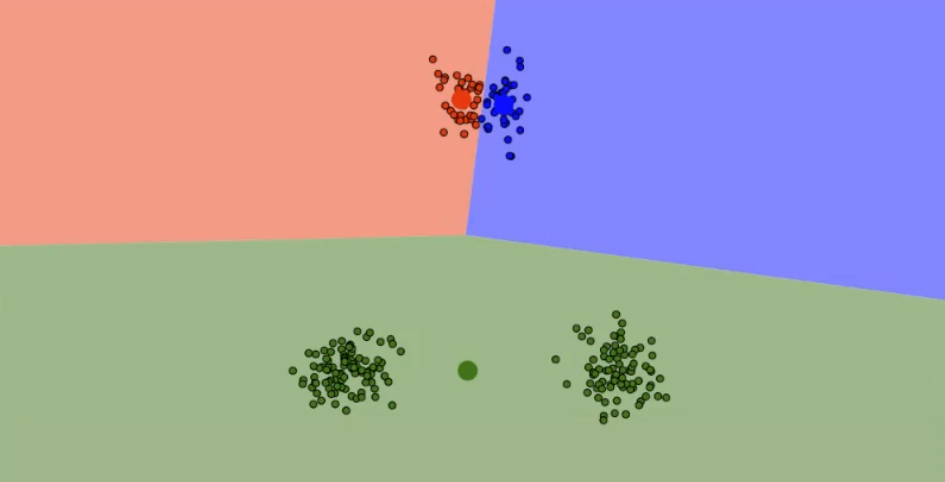

Are these the ideal clusters in this case? No!

**Our algorithm convergence depends upon the random points it has chosen.**

wcss of case 2 will be higher than wcss of case 1.

Let's check by running this in a loop and look at the value of k vs wcss, the elbow graph.

##### Elbow Graph

In [15]:
import warnings
warnings.filterwarnings('ignore')

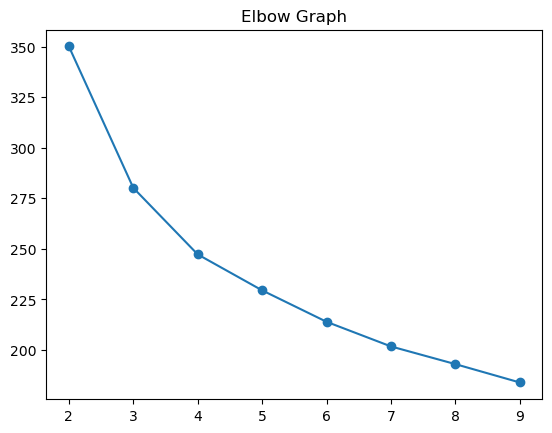

In [16]:
wcss = []
for k in range(2,10):
    km = KMeans(n_clusters=k, init = "random")
    m = km.fit(X)
    wcss.append(m.inertia_)

plt.plot(np.arange(2,10), wcss, '-o')
plt.title('Elbow Graph')
plt.show()

k = 4 to 5, wcss doesn't change much.
<br>From 350 to 275 is a good decrease.
<br>From 275 to 250 is very marginal.
<br>k = 3 or 4 seems like the ideal value of k here.

We also have to keep in mind the scale of the graph, the value of wcss.
<br>There may not be that much difference but the graph shows a steep decrease from 3 to 4.

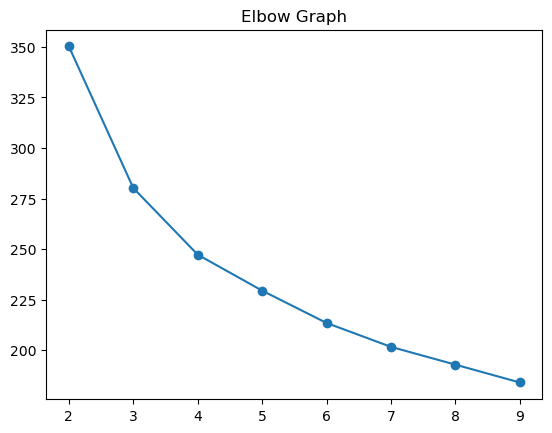

In [17]:
# K-Means++ gives the same solution
wcss = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    m = km.fit(X)
    wcss.append(m.inertia_)

plt.plot(np.arange(2,10), wcss, '-o')
plt.title('Elbow Graph')
plt.show()

### K-Means++

It has two things:
1. You can pick randomly, the first centroid.
2. The second centroid has to be chosen in such a ways that it is the farthest data point from the existing centroid.
3. Pick a point that is farthest from both the previous centroids.

1. Pick a random first centroid.

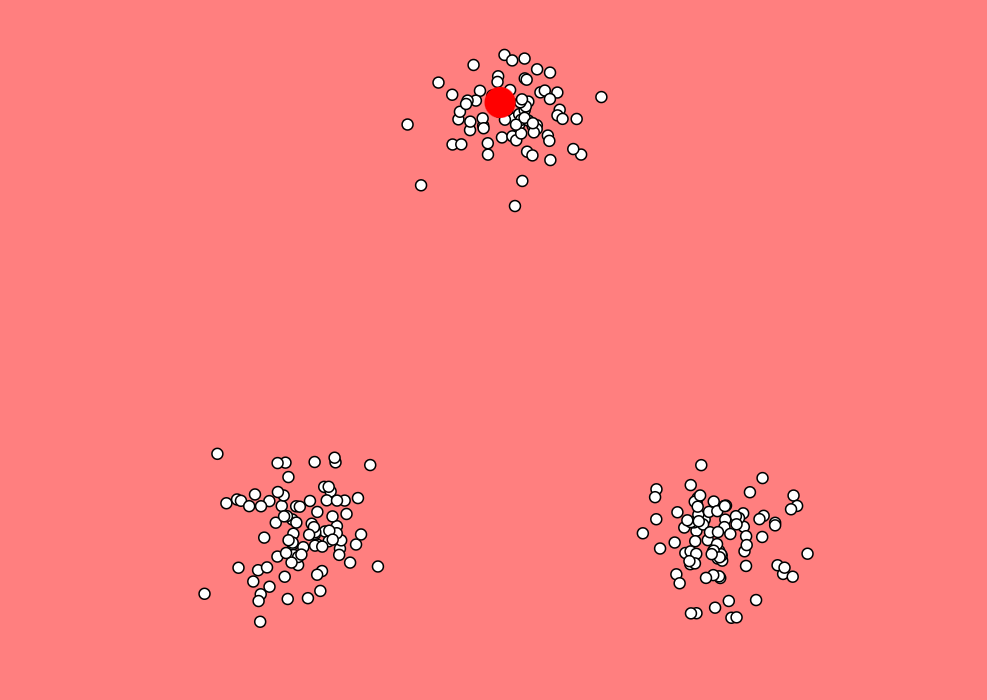

2. The second centroid gets automatically chosen in such a ways that it is the **farthest data point** from the existing centroid.

Below are potentially the farthest points:

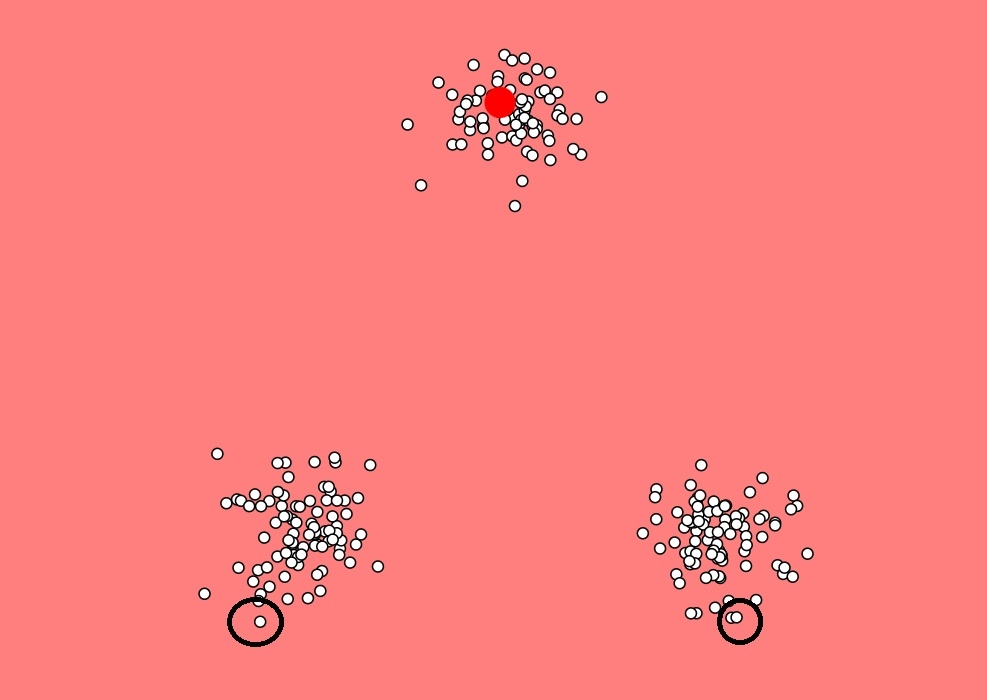

The second point is:

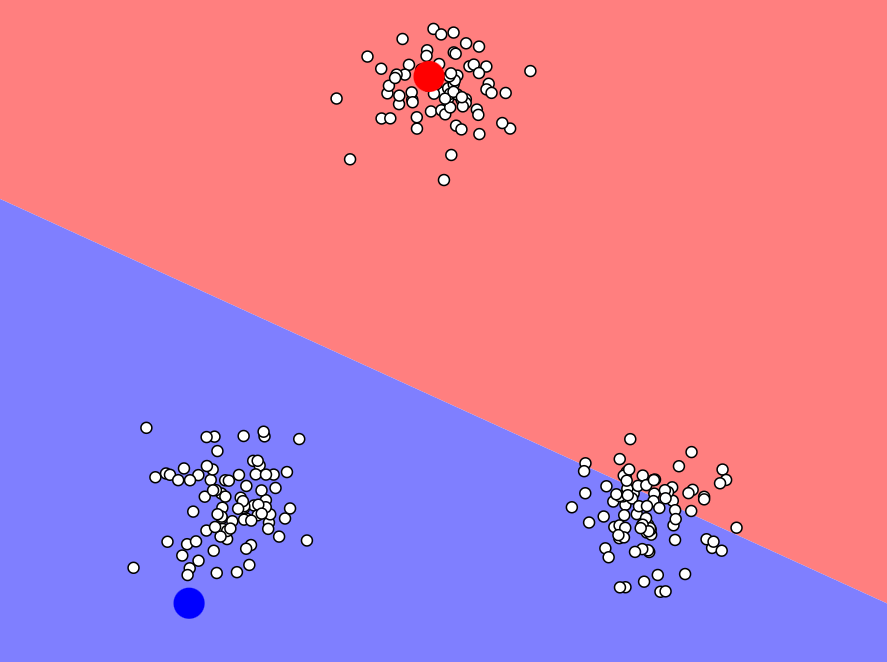

3. Pick a point that is farthest from both the previous centroids.

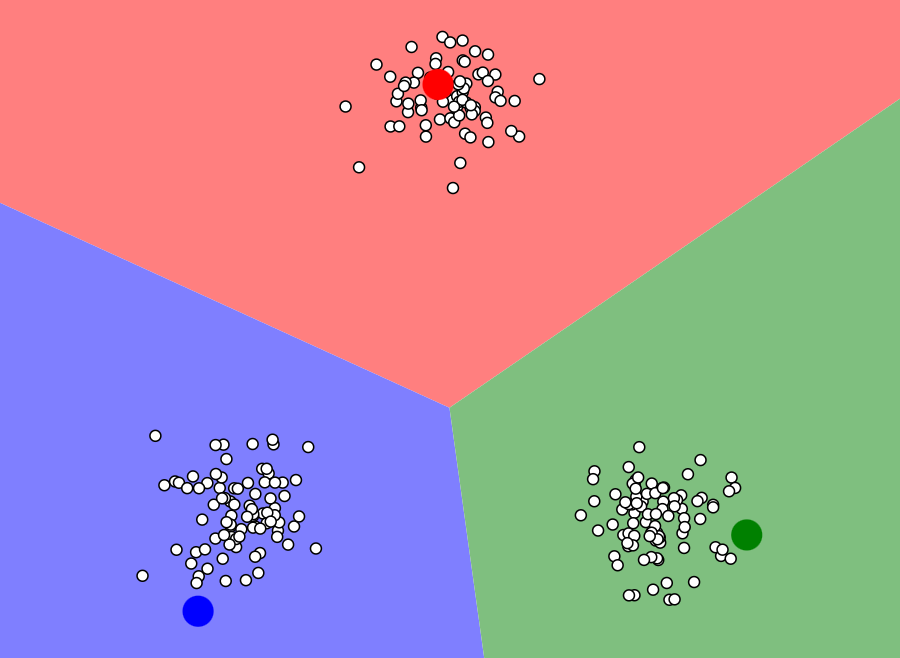

After couple of iterations, we get the convergence:

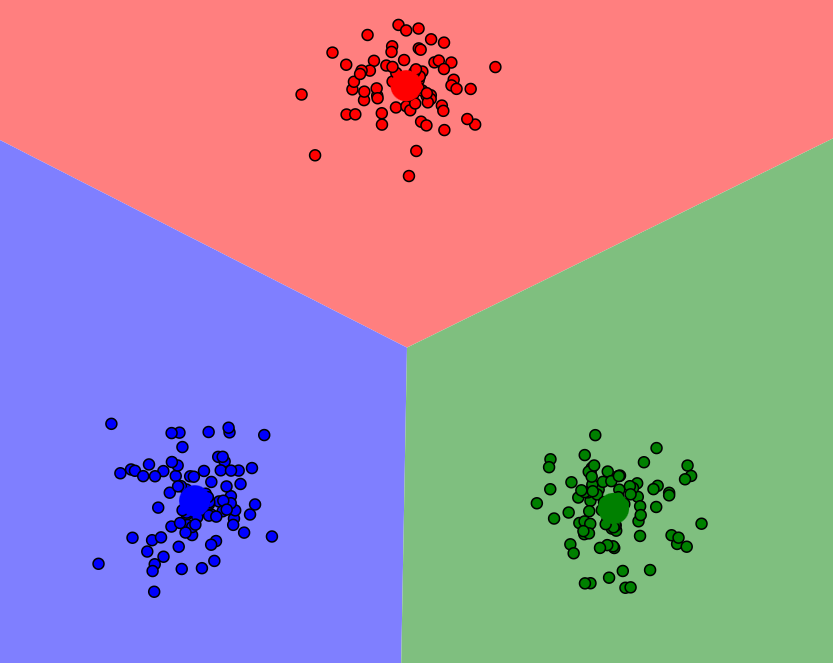

That smart ways of selecting the centroids has made our algorithm smarter and improved convergence.

##### Let's talk about n_init

Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia.

### Silhouette Score:

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. - wikipedia

In [21]:
# !pip install yellowbrick

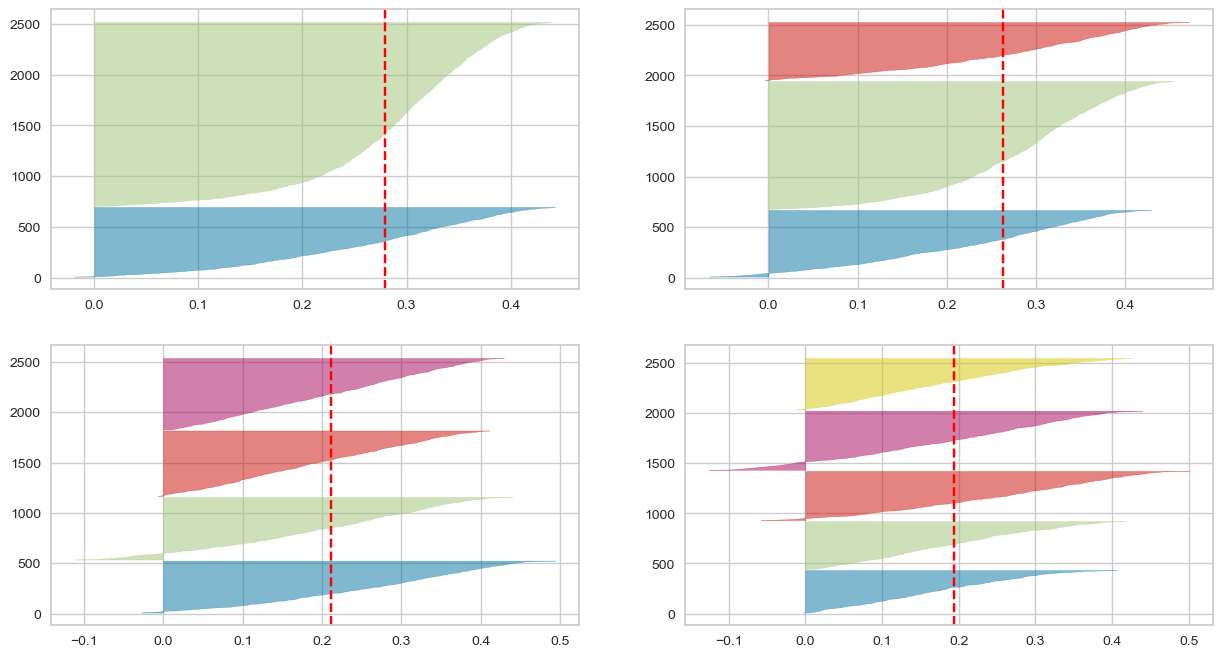

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2,6):
    '''
    Create KMeans instance for different number of clusters
    '''
    # max_iter: maximum number of iterations that the KMeans algo will run in order to converge to a solution.
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

Red line indicates the silhouette score. <br>K = 2 is better in terms of score.<br>
But, you should also look at the density of your cluster. In the plot of k = 2, one of the clusters has a high density and the other has way too small density.<br>
Compared to k = 3, the three clusters have good amount of density. So, we'll pick k = 3

---
Let's see how the `divmod(i, 2)` operation works with some sample numbers for `i`:

1. When `i = 2`:
   - `divmod(2, 2)` returns a tuple `(1, 0)`.
   - `q` takes the value `1` (the first element of the tuple).
   - `mod` takes the value `0` (the second element of the tuple).

2. When `i = 3`:
   - `divmod(3, 2)` returns a tuple `(1, 1)`.
   - `q` takes the value `1` (the first element of the tuple).
   - `mod` takes the value `1` (the second element of the tuple).

3. When `i = 4`:
   - `divmod(4, 2)` returns a tuple `(2, 0)`.
   - `q` takes the value `2` (the first element of the tuple).
   - `mod` takes the value `0` (the second element of the tuple).

4. When `i = 5`:
   - `divmod(5, 2)` returns a tuple `(2, 1)`.
   - `q` takes the value `2` (the first element of the tuple).
   - `mod` takes the value `1` (the second element of the tuple).

Now, let's consider how these `q` and `mod` values are used to access the correct subplot in the 2x2 grid (`ax[q-1][mod]`):

- When `i = 2`, `ax[q-1][mod]` is equivalent to `ax[1-1][0]`, which is `ax[0][0]`. This means the first silhouette visualization will be displayed in the top-left subplot.

- When `i = 3`, `ax[q-1][mod]` is equivalent to `ax[1-1][1]`, which is `ax[0][1]`. This means the second silhouette visualization will be displayed in the top-right subplot.

- When `i = 4`, `ax[q-1][mod]` is equivalent to `ax[2-1][0]`, which is `ax[1][0]`. This means the third silhouette visualization will be displayed in the bottom-left subplot.

- When `i = 5`, `ax[q-1][mod]` is equivalent to `ax[2-1][1]`, which is `ax[1][1]`. This means the fourth silhouette visualization will be displayed in the bottom-right subplot.

In summary, the `divmod(i, 2)` operation helps in organizing the silhouette visualizations for different numbers of clusters (2, 3, 4, and 5) in a 2x2 grid, where each visualization is placed in a specific subplot based on the calculated `q` and `mod` values. This allows you to easily compare and analyze the silhouette scores for different clustering configurations.

--- 
Let's see how the `divmod(i, 2)` operation works for `i` values 6, 7, 8, and 9:

1. When `i = 6`:
   - `divmod(6, 2)` returns a tuple `(3, 0)`.
   - `q` takes the value `3` (the first element of the tuple).
   - `mod` takes the value `0` (the second element of the tuple).
   - `ax[q-1][mod]` is equivalent to `ax[3-1][0]`, which is `ax[2][0]`. The visualization will be displayed in the third row, first column.

2. When `i = 7`:
   - `divmod(7, 2)` returns a tuple `(3, 1)`.
   - `q` takes the value `3` (the first element of the tuple).
   - `mod` takes the value `1` (the second element of the tuple).
   - `ax[q-1][mod]` is equivalent to `ax[3-1][1]`, which is `ax[2][1]`. The visualization will be displayed in the third row, second column.

3. When `i = 8`:
   - `divmod(8, 2)` returns a tuple `(4, 0)`.
   - `q` takes the value `4` (the first element of the tuple).
   - `mod` takes the value `0` (the second element of the tuple).
   - `ax[q-1][mod]` is equivalent to `ax[4-1][0]`, which is `ax[3][0]`. The visualization will be displayed in the fourth row, first column.

4. When `i = 9`:
   - `divmod(9, 2)` returns a tuple `(4, 1)`.
   - `q` takes the value `4` (the first element of the tuple).
   - `mod` takes the value `1` (the second element of the tuple).
   - `ax[q-1][mod]` is equivalent to `ax[4-1][1]`, which is `ax[3][1]`. The visualization will be displayed in the fourth row, second column.

So, with these additional `i` values (6, 7, 8, and 9), we now have a total of eight silhouette visualizations, each corresponding to a different number of clusters (2, 3, 4, 5, 6, 7, 8, and 9), displayed in a 2x2 grid. The `divmod(i, 2)` operation helps in arranging the visualizations efficiently in the subplot grid, making it easier to compare the clustering results for various configurations.

---

Using divmod(i, 2) directly for indexing subplots in the given code snippet will not work correctly for i values greater than 5.

---

In [23]:
from sklearn.metrics import silhouette_score

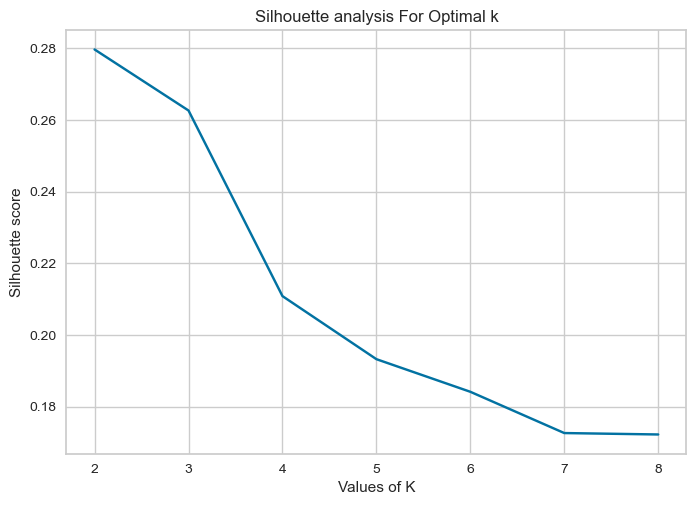

In [24]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Going beyond 3 clusters does not make sense. Range of Silhouette score is (-1,1) and hence, at 4 clusters, the value is becoming too low.

In [11]:
k=3 # Final number 

km = KMeans(n_clusters= k) 
km.fit(X)

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
km.labels_

array([2, 2, 1, ..., 2, 0, 1])

In [13]:
df.shape

(2500, 7)

In [17]:
df.head(2)

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,1476,130,65,213.905831,31.600751,233,235,2
1,1535,543,46,639.223004,5.689175,228,170,2


In [20]:
X[:2]  # X is the scaled np array without ID column. It's an np array cuz that's what k-means takes.

array([[0.06688963, 0.22088353, 0.03257084, 0.01301296, 0.45330739,
        0.4017094 ],
       [0.41220736, 0.14457831, 0.0973327 , 0.00234276, 0.44357977,
        0.29059829]])

In [15]:
df["cluster"] = km.labels_   # adding labels to the original df, (not X).

In [16]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,1476,130,65,213.905831,31.600751,233,235,2
1,1535,543,46,639.223004,5.689175,228,170,2
2,1807,520,102,1157.402763,844.321606,247,409,1
3,1727,702,83,1195.903634,850.041757,148,200,1
4,1324,221,84,180.754616,64.283300,243,259,2


In [18]:
df.cluster.value_counts()  # it tells which cluster has how many datapoints that it has been assigned to.

2    1265
1     660
0     575
Name: cluster, dtype: int64

Let's say you got one more customer, one more data point that belongs to one customer, how do you know which cluster it belongs to?

In [21]:
km.cluster_centers_   # we have these three centroids cuz we had three clusters. 

array([[0.16989385, 0.23338572, 0.49447988, 0.03292963, 0.38490272,
        0.36536603],
       [0.44884843, 0.46635633, 0.21387334, 0.4626965 , 0.3936623 ,
        0.33861694],
       [0.28128082, 0.32107243, 0.09851185, 0.05980102, 0.39238092,
        0.33642242]])

1. For a new point, you need to transform the new data to minmaxscaler as well and compute the distances between the point and the centroids, whichever is minimum assign to that centroid. 
2. K-means comes with a predict method which does exactly the same thing when you provide the new data.

In [ ]:
km.predict("Newdata") 

So, you don't need to relearn this entire exercise. Just use predict method.

##### Limitations of K-means clustering algorithm:

1. You have to decide k.
2. K-means doesn't perform well when we have different size clusters. Especially when one cluster is much big and other clusters are small.

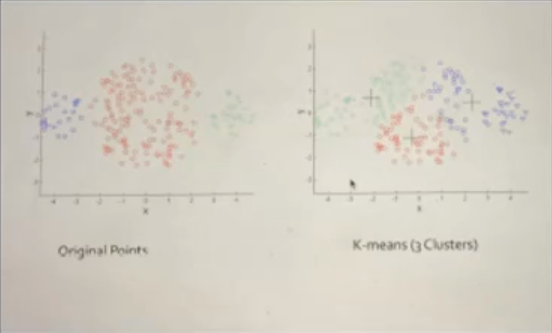

In the original data points, you can see the ideal case of clustering. But, what K-means does is on the right side because it will try to look at the centroids where it gets balanced datapoints.

3. **Different Density**

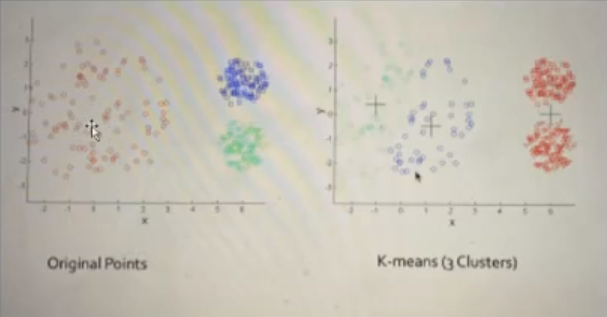

- Left hand side has the ideal clusters. 
- Points are very dense in the small clusters whereas the points are very sparse in the bigger cluster. 
- K-means gives clusters as on the right. + sign is the centroid

4. **Non Spherical clusters:** K-means cluster kind of creates spherical boundaries and tries clusters in those spherical boundaries. something like below.

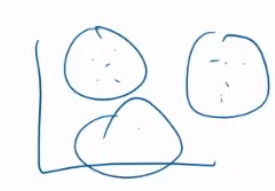

But, if you look at the data below:

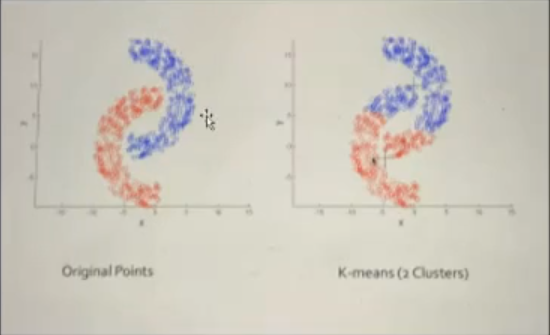

- This a classic example of non-spherical clusters. 
- Red and Blue points belong to different clusters. 
- But, K-means being based on centroids will give the clusters on the right.

### Hierarchical Clustering 

In [23]:
df_stocks = pd.read_csv('Stocks.csv', index_col=0)

In [24]:
df_stocks.shape

(46, 9)

In [25]:
df_stocks.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,1657751076864,12901505,-0.179,180.288,159007899648,0.00000,0.28442,-0.207,-16.891368
ASIANPAINT,3167850856448,933762,0.789,143.991,319870205952,0.00000,0.10876,0.788,-3.813726
AXISBANK,2221430013952,6403035,0.859,400.581,433654104064,0.01474,0.37225,0.855,-43.305372
BAJAJ-AUTO,996960239616,442625,-0.006,1033.043,348966289408,0.00000,0.17649,-0.007,-0.566448
BAJFINANCE,4343084089344,819955,1.590,724.584,202325999616,0.00000,0.42614,1.586,-34.809406


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_stocks)
X_stock = scaler.transform(df_stocks)

In [31]:
X_stock[:2]

array([[-0.38373204,  0.81782784, -0.71951992, -0.48432676, -0.64272029,
        -0.50452356,  1.20533632, -0.75982109, -0.36029843],
       [ 0.1333849 , -0.4961962 ,  0.3306221 , -0.54086688, -0.50766513,
        -0.50452356, -0.50854664,  0.34075207,  0.11294558]])

In [ ]:
scaled_df = pd.DataFrame(X_stock, columns=df_stocks.columns, index=df_stocks.index) # converting it back to a dataframe

In [33]:
scaled_df.head(2)

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,-0.383732,0.817828,-0.719520,-0.484327,-0.642720,-0.504524,1.205336,-0.759821,-0.360298
ASIANPAINT,0.133385,-0.496196,0.330622,-0.540867,-0.507665,-0.504524,-0.508547,0.340752,0.112946


scikit learn does not have inbuilt dendogram. Thus, we're not using it.

In [28]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(scaled_df, metric='euclidean', method='ward')  # method = 'single', which is the default, is minimum linkage

Text(0, 0.5, 'distance')

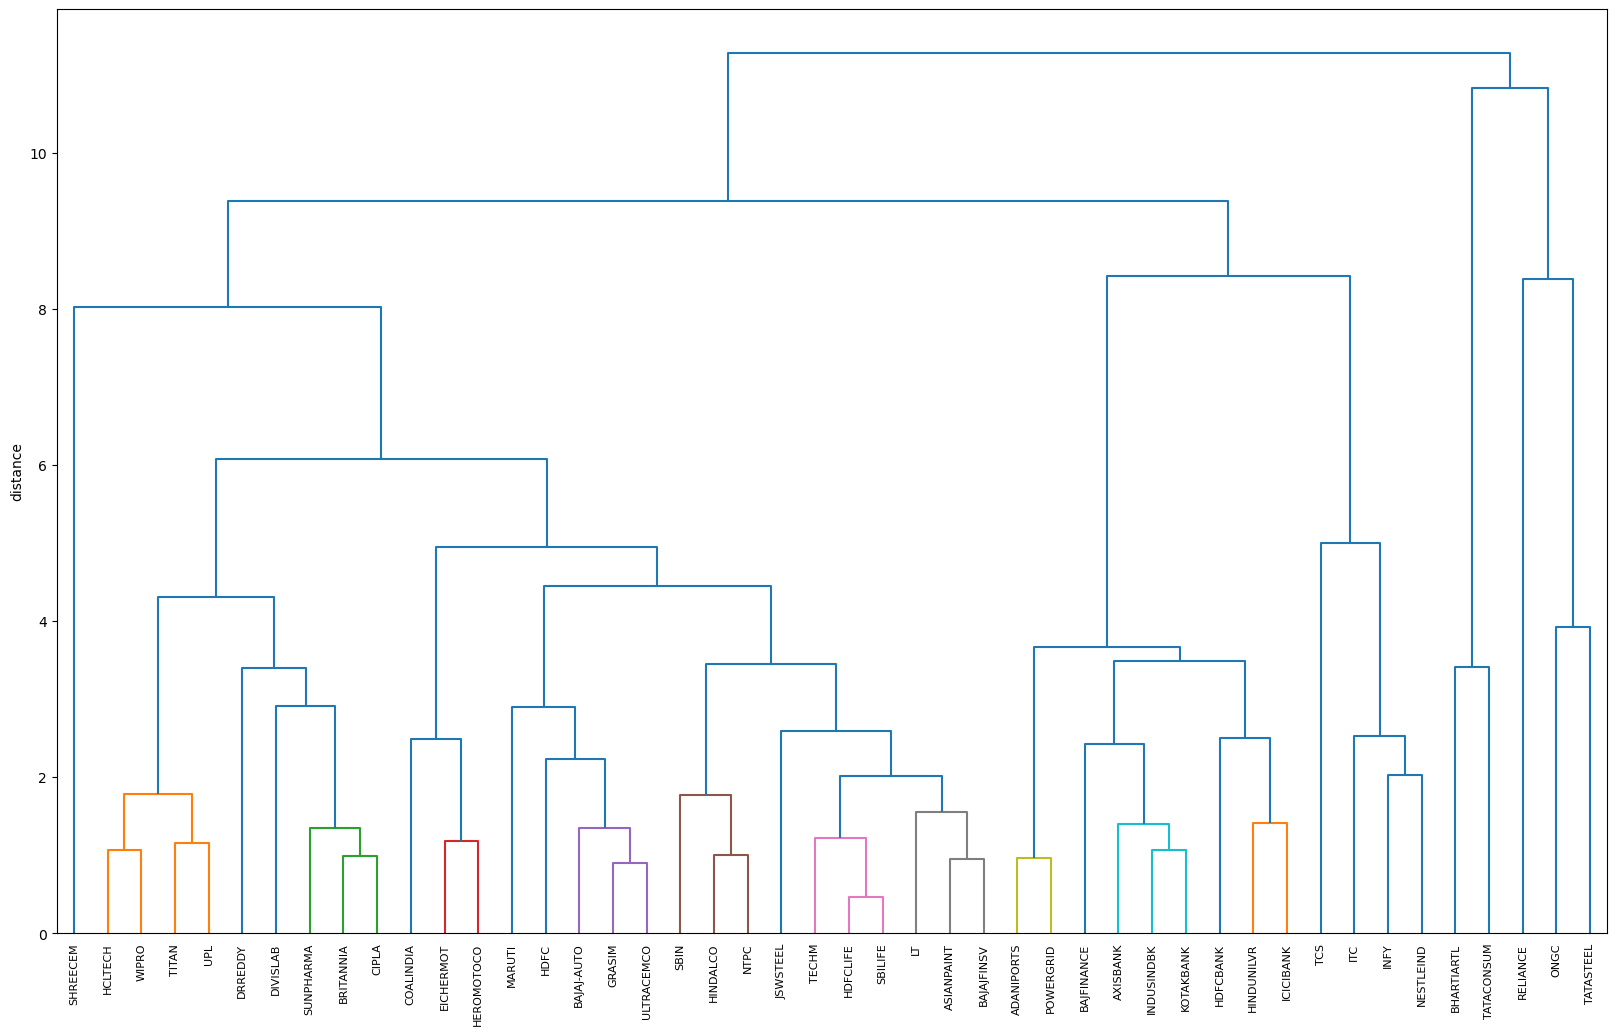

In [29]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

# color_threshold=2: This parameter specifies the distance threshold at which the dendrogram branches should be colored. 
# Branches that merge at distances greater than the color_threshold will have the same color, indicating a cluster or group. 
# In this case, branches that merge at a distance greater than 2 will be colored.

- HCLTECH and WIPRO got combined. That means these stocks are behaving very similar with respect to the attributes that we're looking at. And it makes sense cuz both are tech stocks and both are consulting companies.
- Now, by looking at the dendogram, you can decide what is the ideal number of clusters to go with.
- If Wipro is going down, HCL may behave the same way.
- For diversification, you take multiple clusters and pick one stock from each cluster.

**If you have any questions, get in touch with me here:**<br><br>
[Stalk and Support Me](https://linktr.ee/khushalkumar31)